# Parker Christenson Assignment 4 

### 6/2/2024

1. Create a k-means model with the assignment dataset using at least 10 features.
2. Experiment with at least 3 k values. Be sure to transform variables into the appropriate format before modeling. Note that a larger k will increase the overhead of interpretation, so it is suggested to keep the k less than 10.
 - What transformations did you apply to the raw dataset?
 - What were different k's chosen? What were the differences in the output with those different k's?
3. Choose a final k that you think reflects the data the best and provide a written interpretation of the different clusters generated by k-means
 - Why did you choose this k and distance metric?
 - Why does it appear these groups have been created? What are the influential features?
 - Are there any inferences you can draw that would be relevant from a business context about the different groups?

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [27]:
# loading the data using polars then converting it to pandas
df = pl.read_csv('train_data.csv').to_pandas()

In [28]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,410704,0,Cash loans,F,N,Y,1,157500.00000000,900000.00000000,26446.50000000,...,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,381230,0,Cash loans,F,N,Y,1,90000.00000000,733176.00000000,21438.00000000,...,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,2.00000000,1.00000000
2,450177,0,Cash loans,F,Y,Y,0,189000.00000000,1795500.00000000,62541.00000000,...,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,332445,0,Cash loans,M,Y,N,0,175500.00000000,494550.00000000,45490.50000000,...,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000
4,357429,0,Cash loans,F,Y,Y,0,270000.00000000,1724688.00000000,54283.50000000,...,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [29]:
# taking only the columns that are needed and making it a new dataframe
df = df[[ 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']]
# and making the column names all lowercase
df.columns = df.columns.str.lower()
df.head()

,target,code_gender,flag_own_car,cnt_children,amt_income_total,amt_credit
0,0,F,N,1,157500.00000000,900000.00000000
1,0,F,N,1,90000.00000000,733176.00000000
2,0,F,Y,0,189000.00000000,1795500.00000000
3,0,M,Y,0,175500.00000000,494550.00000000
4,0,F,Y,0,270000.00000000,1724688.00000000


In [30]:
# converting the values in the df that are Y and N to 1 and 0 
df['flag_own_car'] = df['flag_own_car'].replace({'Y': 1, 'N': 0})
df['code_gender'] = df['code_gender'].replace({'M': 1, 'F': 0})

# copied the code from the lab lol
means = []
for col in df.columns:
    print(f'Producing stats for column: {col}')
    print(df[col].describe([0.1, 0.25, 0.5, 0.75, 0.9]))
    means.append([col,df[col].describe()['mean']])


Producing stats for column: target
count   153755.00000000
mean         0.08072583
std          0.27241449
min          0.00000000
10%          0.00000000
25%          0.00000000
50%          0.00000000
75%          0.00000000
90%          0.00000000
max          1.00000000
Name: target, dtype: float64
Producing stats for column: code_gender
count   153755.00000000
mean         0.34268804
std          0.47460975
min          0.00000000
10%          0.00000000
25%          0.00000000
50%          0.00000000
75%          1.00000000
90%          1.00000000
max          1.00000000
Name: code_gender, dtype: float64
Producing stats for column: flag_own_car
count   153755.00000000
mean         0.33944912
std          0.47352389
min          0.00000000
10%          0.00000000
25%          0.00000000
50%          0.00000000
75%          1.00000000
90%          1.00000000
max          1.00000000
Name: flag_own_car, dtype: float64
Producing stats for column: cnt_children
count   153755.00000000
m

C:\Users\tehwh\AppData\Local\Temp\ipykernel_10028\3331178554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['flag_own_car'] = df['flag_own_car'].replace({'Y': 1, 'N': 0})
C:\Users\tehwh\AppData\Local\Temp\ipykernel_10028\3331178554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['code_gender'] = df['code_gender'].replace({'M': 1, 'F': 0})


In [31]:
# looking at the means of the columns
pd.DataFrame(means, columns = ['column', 'mean'])

,column,mean
0,target,0.08072583
1,code_gender,0.34268804
2,flag_own_car,0.33944912
3,cnt_children,0.41739781
4,amt_income_total,169261.08923307
5,amt_credit,598882.39946668


In [32]:
# seeing how many null values are in the columns
df.isnull().sum()

target              0
code_gender         0
flag_own_car        0
cnt_children        0
amt_income_total    0
amt_credit          0
dtype: int64

c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

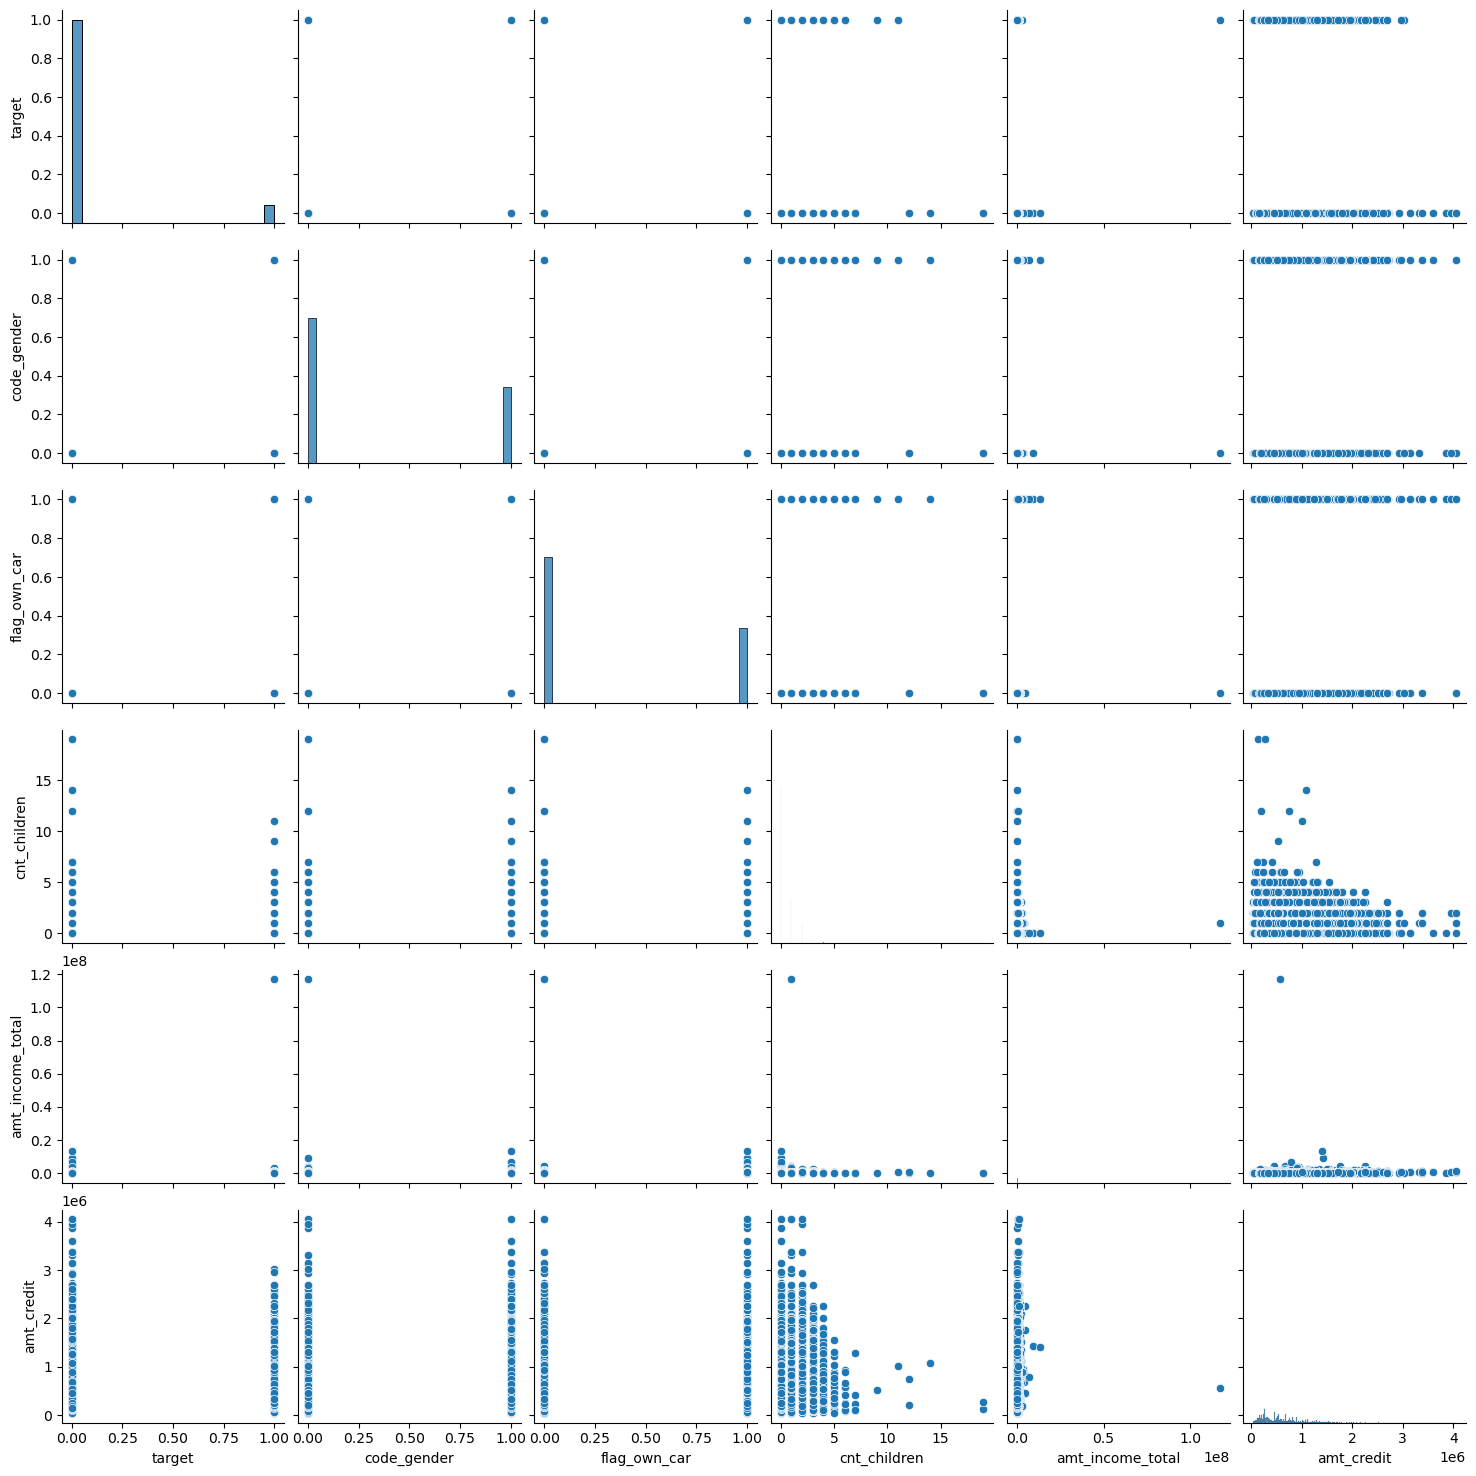

In [33]:
# using the pairplot to see the relationships between the columns
sns.pairplot(df)
plt.show()

### `It looks a little bit rough, but we are going to look and scale the data to see if it makes the model look a little bit better. I was honestly hoping for beter clustering`

In [34]:
from sklearn.preprocessing import StandardScaler

# scale da data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns = df.columns)

In [35]:
# eval again

means_scaled = []
for cols in scaled_df.columns:
    print(f'Producing stats for column: {cols}')
    print(scaled_df[cols].describe([0.1, 0.25, 0.5, 0.75, 0.9]))
    means_scaled.append([cols, scaled_df[cols].describe()['mean']])

Producing stats for column: target
count   153755.00000000
mean        -0.00000000
std          1.00000325
min         -0.29633553
10%         -0.29633553
25%         -0.29633553
50%         -0.29633553
75%         -0.29633553
90%         -0.29633553
max          3.37455312
Name: target, dtype: float64
Producing stats for column: code_gender
count   153755.00000000
mean         0.00000000
std          1.00000325
min         -0.72204408
10%         -0.72204408
25%         -0.72204408
50%         -0.72204408
75%          1.38495700
90%          1.38495700
max          1.38495700
Name: code_gender, dtype: float64
Producing stats for column: flag_own_car
count   153755.00000000
mean         0.00000000
std          1.00000325
min         -0.71685977
10%         -0.71685977
25%         -0.71685977
50%         -0.71685977
75%          1.39497296
90%          1.39497296
max          1.39497296
Name: flag_own_car, dtype: float64
Producing stats for column: cnt_children
count   153755.00000000
m

In [36]:
pd.DataFrame(means_scaled, columns = ['column', 'mean'])

,column,mean
0,target,-0.00000000
1,code_gender,0.00000000
2,flag_own_car,0.00000000
3,cnt_children,0.00000000
4,amt_income_total,0.00000000
5,amt_credit,0.00000000


c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tehwh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

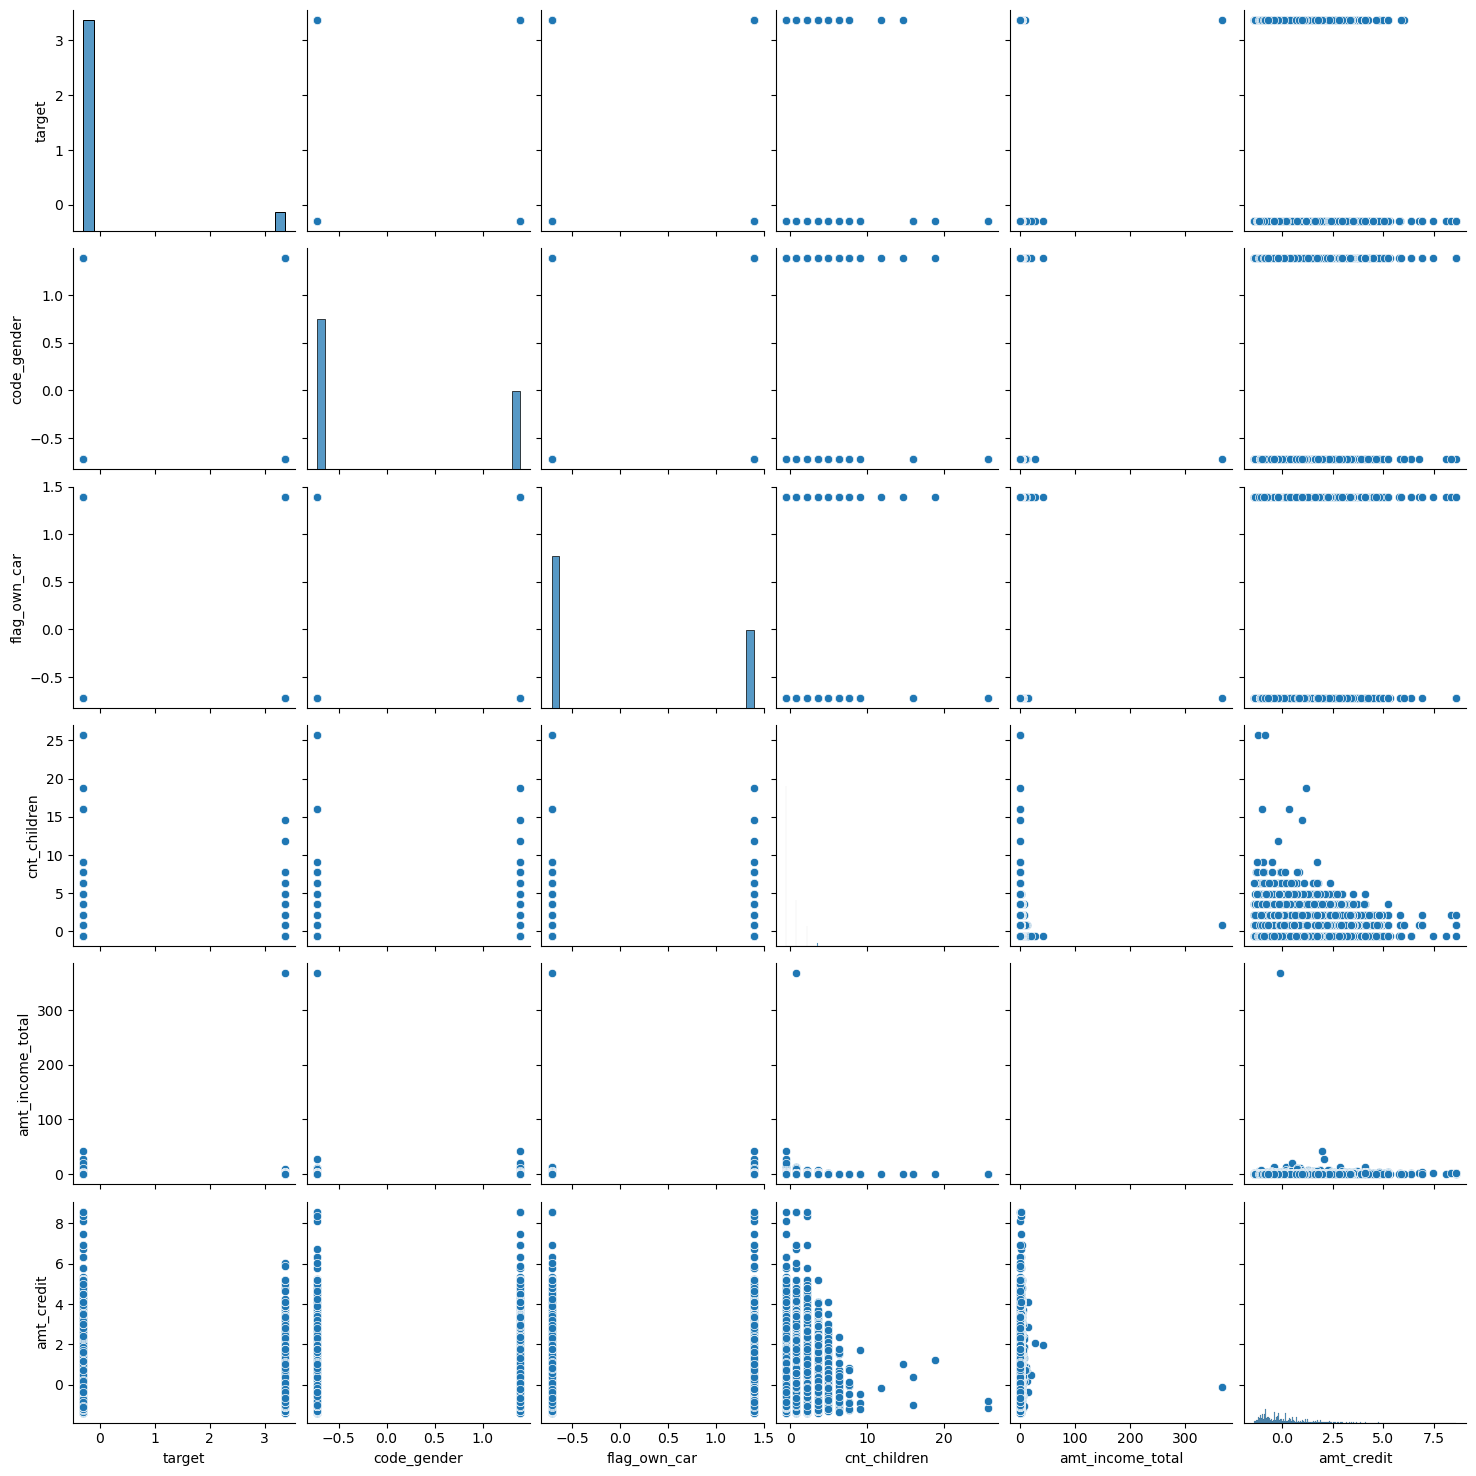

In [37]:
# plotting the scaled data
sns.pairplot(scaled_df)
plt.show()

### `Why I chose the values I did for k`
I chose the values of k that I did because I wanted to see how the clusters would change with different values of k. I chose 3, 5, and 7 because I wanted to see how the clusters would change with a small, medium, and large value of k and how the elbow plot would look with three incremental values. I did not choose a value of k less than 3 or exceeed 10. I wanted to keep the variables roughly the same in spacing because then you can evalueate if the model is performing well of if you need to make any other changes to the mdoel like feature selection, engineering etc.. 

In [38]:
# importing sklearn libraries for kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [39]:
scaled_df = scaled_df.dropna()

In [40]:
scaled_df.head()

,target,code_gender,flag_own_car,cnt_children,amt_income_total,amt_credit
0,-0.29633553,-0.72204408,-0.71685977,0.80634676,-0.03697531,0.74835356
1,-0.29633553,-0.72204408,-0.71685977,0.80634676,-0.24918641,0.33375364
2,-0.29633553,-0.72204408,1.39497296,-0.57769671,0.06205653,2.97389805
3,-0.29633553,1.38495700,1.39497296,-0.57769671,0.01961431,-0.25929246
4,-0.29633553,-0.72204408,1.39497296,-0.57769671,0.31670985,2.79791228


In [41]:
# printing the data types of the columns
scaled_df.dtypes

# limiting the decimal places to 10 in the scaled_df
pd.options.display.float_format = '{:.8f}'.format
scaled_df.head()


,target,code_gender,flag_own_car,cnt_children,amt_income_total,amt_credit
0,-0.29633553,-0.72204408,-0.71685977,0.80634676,-0.03697531,0.74835356
1,-0.29633553,-0.72204408,-0.71685977,0.80634676,-0.24918641,0.33375364
2,-0.29633553,-0.72204408,1.39497296,-0.57769671,0.06205653,2.97389805
3,-0.29633553,1.38495700,1.39497296,-0.57769671,0.01961431,-0.25929246
4,-0.29633553,-0.72204408,1.39497296,-0.57769671,0.31670985,2.79791228


In [42]:
# creating the kmeans models by using a function to make 3 clusters at the k vals 3, 5, 7

def kmeans (df, num_clst):
    kmn = KMeans(n_clusters = num_clst, n_init='auto', random_state = 0) 
    kmn.fit(df) 
    kmn_lbl = kmn.labels_ 
    kmn_distortion = kmn.inertia_ 
    return kmn, kmn_lbl, kmn_distortion

In [43]:
try:
    # 3 clusters
    kmn_3_mod, kmn_3_labels, kmn_3_dist = kmeans(scaled_df, 3)
    silhouette_3 = silhouette_score(scaled_df, kmn_3_labels)
    print(f"Silhouette Score for 3 clusters: {silhouette_3}")

    # 5 clusters
    kmn_5_mod, kmn_5_labels, kmn_5_dist = kmeans(scaled_df, 5)
    silhouette_5 = silhouette_score(scaled_df, kmn_5_labels)
    print(f"Silhouette Score for 5 clusters: {silhouette_5}")

    # 7 clusters
    kmn_7_mod, kmn_7_labels, kmn_7_dist = kmeans(scaled_df, 7)
    silhouette_7 = silhouette_score(scaled_df, kmn_7_labels)
    print(f"Silhouette Score for 7 clusters: {silhouette_7}")

except Exception as e:
    print(f"An error occurred: {e}")

Silhouette Score for 3 clusters: 0.2697388227694651
Silhouette Score for 5 clusters: 0.3350736629797549
Silhouette Score for 7 clusters: 0.3581969695955046


In [44]:
# creating the kmeans models by using a function to make 3 clusters at the k vals 3, 5, 7

def kmeans (df, num_clst):
    kmn = KMeans(n_clusters = num_clst, n_init='auto', random_state = 0) 
    kmn.fit(df) 
    kmn_lbl = kmn.labels_ 
    kmn_distortion = kmn.inertia_ 
    return kmn, kmn_lbl, kmn_distortion


# 3 
#kmn_3_mod, kmn_3_labels, kmn_3_dist = kmeans (scaled_df, 3)
silhouette_3 = silhouette_score(scaled_df, kmn_3_labels)
# 5 
kmn_5_mod, kmn_5_labels, kmn_5_dist = kmeans (scaled_df, 5)
silhouette_5 = silhouette_score(scaled_df, kmn_5_labels)
# 7
kmn_7_mod, kmn_7_labels, kmn_7_dist = kmeans (scaled_df, 7)
silhouette_7 = silhouette_score(scaled_df, kmn_7_labels)


In [45]:
# doing the print statements
print(f'KMeans with 3 clusters has a silhouette score of {silhouette_3}')
print(f'KMeans with 5 clusters has a silhouette score of {silhouette_5}')
print(f'KMeans with 7 clusters has a silhouette score of {silhouette_7}')

KMeans with 3 clusters has a silhouette score of 0.2697388227694651
KMeans with 5 clusters has a silhouette score of 0.3350736629797549
KMeans with 7 clusters has a silhouette score of 0.3581969695955046


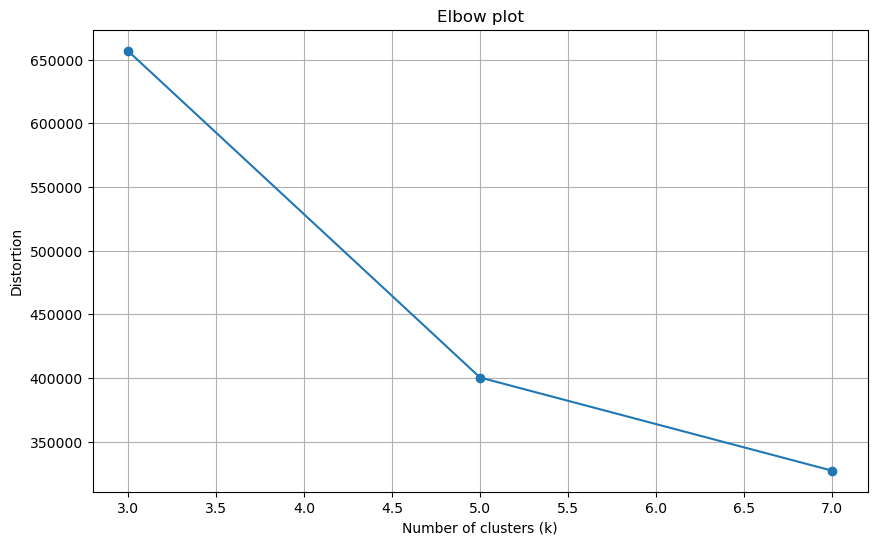

In [46]:
# doing an elbow plot to see the best k value
figure = plt.figure(figsize=(10, 6))
plt.plot([3, 5, 7], [kmn_3_dist, kmn_5_dist, kmn_7_dist], marker='o')
plt.grid(True)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow plot')
plt.show()

In [47]:
target = df['target']

eval_df = df.copy()
eval_df['target'] = target
eval_df['kmn_3_label'] = kmn_3_labels
eval_df['kmn_5_label'] = kmn_5_labels
eval_df['kmn_7_label'] = kmn_7_labels



def group_by_cluster(df, col_val):
    exclude_columns = ['target', 'kmn_3_label', 'kmn_5_label', 'kmn_7_label']
    cont_cols = [col for col in df.columns if col not in exclude_columns]
    df_group = df.groupby(col_val)[cont_cols].agg(['mean', 'median', 'std']).reset_index()
    value_counts = df.groupby(col_val)['target'].agg(lambda x:x.value_counts().to_dict())
    return df_group, value_counts

In [48]:
summary_stats_3, target_groups, = group_by_cluster(eval_df, 'kmn_3_label')
summary_stats_3

kmn_3_label code_gender                       flag_own_car             \
                     mean     median        std         mean     median   
0           0  0.37276318 0.00000000 0.48354561   0.42147344 0.00000000   
1           1  0.31928560 0.00000000 0.46620220   0.30873470 0.00000000   
2           2  0.42820285 0.00000000 0.49483827   0.30750625 0.00000000   

             cnt_children                       amt_income_total  \
         std         mean     median        std             mean   
0 0.49380095   1.38982486 1.00000000 0.62356399  174047.51339949   
1 0.46197374   0.00000000 0.00000000 0.00000000  166987.22270085   
2 0.46147950   0.46529066 0.00000000 0.74339578  171253.66568572   

                                        amt_credit                  \
           median              std            mean          median   
0 157500.00000000  105925.49986166 601169.47208738 517419.00000000   
1 144000.00000000  115774.27135336 602564.72589300 517923.00000000   
2 135000.00000000 1053010.21767678 561643.82338950 497520.00000000   

                   
              std  
0 405099.94143968  
1 407242.32774507  
2 348424.88318524

In [49]:
# looking at the target groups
target_groups

kmn_3_label
0    {0: 42015, 1: 9}
1          {0: 99328}
2          {1: 12403}
Name: target, dtype: object

In [50]:
summary_stats_5, target_groups, = group_by_cluster(eval_df, 'kmn_5_label')
summary_stats_5

kmn_5_label code_gender                       flag_own_car             \
                     mean     median        std         mean     median   
0           0  0.08140791 0.00000000 0.27346530   0.28552013 0.00000000   
1           1  0.00000000 0.00000000 0.00000000   0.19876649 0.00000000   
2           2  0.42823738 0.00000000 0.49484328   0.30753104 0.00000000   
3           3  0.00000000 0.00000000        NaN   0.00000000 0.00000000   
4           4  0.99995560 1.00000000 0.00666326   0.59376179 1.00000000   

             cnt_children                         amt_income_total  \
         std         mean     median        std               mean   
0 0.45166967   1.46129988 1.00000000 0.68527548    159023.88755881   
1 0.39907484   0.00000000 0.00000000 0.00000000    155804.36242901   
2 0.46148984   0.46524754 0.00000000 0.74341025    161833.51197388   
3        NaN   1.00000000 1.00000000        NaN 117000000.00000000   
4 0.49113550   0.36572317 0.00000000 0.60960325    195432.22451948   

                                          amt_credit                  \
              median             std            mean          median   
0    135000.00000000  93792.49294904 589913.63664401 508495.50000000   
1    135000.00000000  88500.13901413 598563.33045170 518562.00000000   
2    135000.00000000  90541.10559189 561643.75507983 497520.00000000   
3 117000000.00000000             NaN 562491.00000000 562491.00000000   
4    180000.00000000 147218.95726900 615328.21148851 521280.00000000   

                   
              std  
0 398286.54004059  
1 402780.67703964  
2 348438.93107651  
3             NaN  
4 417084.54340902

In [51]:
target_groups

kmn_5_label
0    {0: 28686, 1: 9}
1          {0: 67612}
2          {1: 12402}
3              {1: 1}
4          {0: 45045}
Name: target, dtype: object

## `Final k value chosen is 5 `

- I selected the K value of 5 because after the 5th, increaseing the K value would have added very minimal benifit. 

- I attempted to make the least amount of changes to the dataset because I was trying to keep the data as untouched as possible. I did have to change some of the values to binary values, like gender and the own car. With that being said, I did not also have to do any feature engineering as well. 

- Looking at the groupings, I did not create the best clustering dataset, because the clusters are not very clear at all, and I was hoping to see at least some sort of relationship between the structured data. One feature I could have engineered was the total income and the credit amount ratio. To see what a persons habits could be like with money and how much other lenders are willing to give their client. 

- Looking at the models, I can see that their purity scores on the data set are very high. Then looking at the silhouette scores, they are kind of in the mid range at 26-35. The models can seperate the data very well, but not the greatest. I think I would start tuning the parameters on the model 5 to see if I could get better clustering scores. 

- I was trying to aim for highly correlated values for the clusters as I was hoping to see a more clear picture when the model is able to create relationships between the data. With that being said since the data set was looking at the loan approval for a house, I selected the things that In my head make the most sense for a loan approval. 

In [54]:
# func to calculate cluster purity
def calculate_purity(df, labels, target):
    df['cluster'] = labels
    purity = 0
    total_samples = len(df)
    for cluster in np.unique(labels):
        cluster_data = df[df['cluster'] == cluster]
        dominant_class = cluster_data[target].mode()[0]
        dominant_class_count = cluster_data[cluster_data[target] == dominant_class].shape[0]
        purity += (dominant_class_count / total_samples)
    return purity


# calc purity 
purity_3 = calculate_purity(eval_df.copy(), kmn_3_labels, 'target')
purity_5 = calculate_purity(eval_df.copy(), kmn_5_labels, 'target')
purity_7 = calculate_purity(eval_df.copy(), kmn_7_labels, 'target')
print(f"purity for 3 clusters: {purity_3:.4f}")
print(f"purity for 5 clusters: {purity_5:.4f}")
print(f"purity for 7 clusters: {purity_7:.4f}")


purity for 3 clusters: 0.9999
purity for 5 clusters: 0.9999
purity for 7 clusters: 0.9999
